<a href="https://colab.research.google.com/github/DavidsonTL/CapstoneFinal/blob/main/4_23_copy_of_RecentUpdate_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains the results of the NHANES Analytic Guidance and Brief Overview for the 2017-March 2020 Pre-pandemic Data Files. The purpose of The National Health and Nutrition Examination Survey (NHANES) is to give the health as well as nutritional status of American citizens who are not incarcerated. The purpose of this study is to find the relationship between age and hypertension.
Attribute information: Age, BMI, gender,blood pressure,cholesterol,smoking habits, and race.

In [ ]:
#Mount the data set
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

#Set the working dictionary to the folder containing the data
%cd /content

demo_bp = pd.read_csv('Demo_BP_BMI_Smoking.csv')
df = pd.read_csv('Demo_BP_BMI_Smoking.csv')


/content


In [ ]:
#relabel the gender variable
df["RIAGENDR"] = df.RIAGENDR.replace({1: "Male", 2: "Female"})


In [ ]:
df['RIAGENDR'].value_counts()

RIAGENDR
Female    7839
Male      7721
Name: count, dtype: int64

In [ ]:
#relabel the High Blood pressure variable       Did not relabel
df["BPQ020"] = df.BPQ020.replace({1: "Yes", 2: "No"})


In [ ]:
df['BPQ020'].value_counts()

BPQ020
2    6586
     5365
1    3597
9      12
Name: count, dtype: int64

In [ ]:
#relabel the High cholesterol variable  Did not relabel
df["BPQ080"] = df.BPQ080.replace({1: "Yes", 2: "No"})


In [ ]:
df['BPQ080'].value_counts()

BPQ080
2    6832
     5365
1    3295
9      66
7       2
Name: count, dtype: int64

In [ ]:
# Selecting specific columns and renaming them
subset_df = df[['RIDAGEYR', 'BMXBMI', 'BPQ020', 'RIAGENDR', 'BPQ080', 'RIDRETH3','SMQ040']]




In [ ]:
subset_df.head()

,RIDAGEYR,BMXBMI,BPQ020,RIAGENDR,BPQ080,RIDRETH3,SMQ040
0,2,,,Male,,6,
1,13,17.6,,Female,,1,
2,2,15,,Male,,3,
3,29,37.8,2,Female,1,6,
4,21,,2,Female,2,2,


In [ ]:
# Selecting specific columns and renaming them

subset_df.columns = ['Age', 'BMI', 'HighBP', 'Gender', 'HighCholesterol', 'Ethinicity', 'Smoker']



In [ ]:
subset_df['Age'].value_counts()

Age
80    682
0     574
2     431
1     406
10    354
     ... 
75     94
77     81
76     76
78     69
79     69
Name: count, Length: 81, dtype: int64

In [ ]:
subset_df['BMI'].value_counts()

BMI
        2423
26.1      86
24.3      83
25.2      82
29.1      77
        ... 
55.3       1
55         1
59.7       1
58.7       1
12.6       1
Name: count, Length: 479, dtype: int64

In [ ]:
subset_df['HighBP'].value_counts()

HighBP
2    6586
     5365
1    3597
9      12
Name: count, dtype: int64

In [ ]:
subset_df['Gender'].value_counts()

Gender
Female    7839
Male      7721
Name: count, dtype: int64

In [ ]:
subset_df['HighCholesterol'].value_counts()

HighCholesterol
2    6832
     5365
1    3295
9      66
7       2
Name: count, dtype: int64

In [ ]:
subset_df['Ethinicity'].value_counts()

Ethinicity
3    5271
4    4098
1    1990
6    1638
2    1544
7    1019
Name: count, dtype: int64

In [ ]:
subset_df['Smoker'].value_counts()

Smoker
     11671
3     2205
1     1306
2      378
Name: count, dtype: int64

In [ ]:
subset_df.head()

,Age,BMI,HighBP,Gender,HighCholesterol,Ethinicity,Smoker
0,2,,,Male,,6,
1,13,17.6,,Female,,1,
2,2,15,,Male,,3,
3,29,37.8,2,Female,1,6,
4,21,,2,Female,2,2,


In [ ]:
#removing the 7 and 9 responses 4-29-24
# import pandas as pd

# Load the NHANES dataset
#nhanes_data = pd.read_csv("nhanes_dataset.csv")

# Define the columns where you want to remove 7s and 9s
#columns_to_clean = ['column1', 'column2', 'column3']  # Add your column names here

# Replace 7s and 9s with NaN in the specified columns
#nhanes_data[columns_to_clean] = nhanes_data[columns_to_clean].replace({7: pd.NA, 9: pd.NA})

# Drop rows with NaN values in the specified columns
#nhanes_data_cleaned = nhanes_data.dropna(subset=columns_to_clean)

# Now, nhanes_data_cleaned contains the dataset with rows removed where 7s or 9s were present in the specified columns

In [ ]:
import pandas as pd


In [ ]:
# Define the columns where you want to remove 7s and 9s
columns_to_clean = ['BPQ080', 'SMQ040', 'BPQ020']

In [ ]:
# Define the columns where you want to remove 7s and 9s
columns_to_clean = ['HighCholesterol', 'Smoker', 'HighBP']

In [ ]:
 #Replace 7s and 9s with NaN in the specified columns
df[columns_to_clean] = df[columns_to_clean].replace({7: pd.NA, 9: pd.NA})



In [ ]:
df['BPQ080'].value_counts()

BPQ080
2    6832
     5365
1    3295
9      66
7       2
Name: count, dtype: int64

In [ ]:
df['HighCholesterol'].value_counts()

KeyError: 'HighCholesterol'

In [ ]:
subset_df['HighCholesterol'].value_counts()

HighCholesterol
2    6832
     5365
1    3295
9      66
7       2
Name: count, dtype: int64

In [ ]:
subset_df['HighBP'].value_counts()

HighBP
2    6586
     5365
1    3597
9      12
Name: count, dtype: int64

In [ ]:
subset_df['Smoker'].value_counts()

Smoker
     11671
3     2205
1     1306
2      378
Name: count, dtype: int64

In [ ]:
# Drop rows with NaN values in the specified columns
nhanes_data_cleaned = subset_df.dropna(subset=columns_to_clean)

In [ ]:
# Remove rows with missing BMI values
df.dropna()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,109263,66,2,Male,2,,5,6,2,1,...,,,,,,,,,,
1,109264,66,2,Female,13,,1,1,2,1,...,36.3,,33.8,,22.7,,63.8,,85,
2,109265,66,2,Male,2,,3,3,2,1,...,,,18.6,,14.8,,41.2,,,
3,109266,66,2,Female,29,,5,6,2,2,...,40.8,,34.7,,35.8,,117.9,,126.1,
4,109267,66,1,Female,21,,2,2,,2,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818,66,2,Male,40,,4,4,1,1,...,45.6,,38.6,,33.6,,114.7,,118,
15556,124819,66,2,Male,2,,4,4,2,1,...,,,17.5,,15.8,,48.4,,,
15557,124820,66,2,Female,7,,3,3,2,1,...,,,24.3,,18.5,,57.5,,,
15558,124821,66,2,Male,63,,4,4,1,1,...,42,,39.5,,31.4,,97.1,,99.8,


In [ ]:
# Function to recode BMI into categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'


In [ ]:
subset_df['BMI'].value_counts()

BMI
        2423
26.1      86
24.3      83
25.2      82
29.1      77
        ... 
55.3       1
55         1
59.7       1
58.7       1
12.6       1
Name: count, Length: 479, dtype: int64

In [ ]:
# Mapping dictionary to recode Ethinicity
recode_map = {
    1: 'Hispanic',  # Mexican American
    2: 'Hispanic',  # Other Hispanic
    3: 'Non-Hispanic White',  # Non-Hispanic White
    4: 'Non-Hispanic Black',  # Non-Hispanic Black
    6: 'Other',  # Non-Hispanic Asian
    7: 'Other'   # Other
}


In [ ]:
df['Ethinicity'] = df['Ethinicity'].map(recode_map)

KeyError: 'Ethinicity'

In [ ]:
df['Ethinicity'].value_counts()

KeyError: 'Ethinicity'

In [ ]:
#filtered_df = subset_df[~subset_df[['HighBP']].isin(['7', '9'])]

In [ ]:
#filtered_df = df[df['HighBP'].notna()]

In [ ]:
#df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

In [ ]:
#df = subset_df[~subset_df[['HighBP']].isin(['7', '9'])]

In [ ]:
#filtered_df = subset_df[~subset_df[['HighBP']].isin(['7', '9'])]

In [ ]:
#df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

In [ ]:
filtered_df['HighBP'].value_counts()

HighBP
2    6586
     5365
1    3597
Name: count, dtype: int64

In [ ]:
filtered_df = subset_df[~subset_df[['HighBP', 'HighCholesterol', 'Ethinicity', 'Smoker', 'Gender']].isin(['7', '9'])]




In [ ]:
# drop rows that contain NaN values
df = filtered_df.dropna()
print(df)

Empty DataFrame
Columns: [Age, BMI, HighBP, Gender, HighCholesterol, Ethinicity, Smoker]
Index: []


In [ ]:
subset_df.head()

,Age,BMI,HighBP,Gender,HighCholesterol,Ethinicity,Smoker
0,2,,,Male,,6,
1,13,17.6,,Female,,1,
2,2,15,,Male,,3,
3,29,37.8,2,Female,1,6,
4,21,,2,Female,2,2,


In [ ]:
filtered_df.head()

,Age,BMI,HighBP,Gender,HighCholesterol,Ethinicity,Smoker
0,NaN,NaN,,Male,,6,
1,NaN,NaN,,Female,,1,
2,NaN,NaN,,Male,,3,
3,NaN,NaN,2,Female,1,6,
4,NaN,NaN,2,Female,2,2,


In [ ]:
subset_df['HighBP'].value_counts()

HighBP
2    6586
     5365
1    3597
9      12
Name: count, dtype: int64

In [ ]:
df = subset_df[subset_df['HighBP'].apply(lambda x: x.isdigit())]

In [ ]:
df['HighBP'].value_counts()

HighBP
2    6586
1    3597
9      12
Name: count, dtype: int64

In [ ]:
filtered_df = subset_df[~subset_df[['HighBP']].isin(['7', '9'])]

In [ ]:
filtered_df['HighBP'].value_counts()

HighBP
2    6586
     5365
1    3597
Name: count, dtype: int64

In [ ]:
filtered_df[['HighBP']].apply(lambda x: x.isdigit())


AttributeError: 'Series' object has no attribute 'isdigit'

In [ ]:
df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

AttributeError: 'float' object has no attribute 'isdigit'

In [ ]:
df = filtered_df[filtered_df[['HighBP','HighCholesterol', 'Ethinicity', 'Smoker', 'Gender']].apply(lambda x: x.isdigit())]

AttributeError: 'Series' object has no attribute 'isdigit'

In [ ]:
df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

AttributeError: 'float' object has no attribute 'isdigit'

In [ ]:
#Examine missing variables
df.isnull().sum()

SEQN        0
SDDSRVYR    0
RIDSTATR    0
RIAGENDR    0
RIDAGEYR    0
           ..
BMIARMC     0
BMXWAIST    0
BMIWAIST    0
BMXHIP      0
BMIHIP      0
Length: 75, dtype: int64

In [ ]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAPROXY,SIAINTRP,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA
count,15560.00000,15560.0,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000
mean,117042.50000,66.0,1.919023,33.742481,3.249871,3.486118,1.230206,1.100064,1.645308,1.974229,20714.921079,20714.921079,1.540553,160.267995
std,4491.92943,0.0,0.272808,25.320532,1.222644,1.622734,1.728083,0.300095,0.478435,0.158457,25323.916482,27114.911523,0.540678,6.974232
min,109263.00000,66.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1017.784203,0.000000,1.000000,149.000000
25%,113152.75000,66.0,2.000000,10.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,7435.543058,6762.821764,1.000000,155.000000
50%,117042.50000,66.0,2.000000,30.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,12712.564300,12639.578577,2.000000,160.000000
75%,120932.25000,66.0,2.000000,56.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,22761.140907,23308.391896,2.000000,166.000000
max,124822.00000,66.0,2.000000,80.000000,5.000000,7.000000,99.000000,2.000000,2.000000,2.000000,338363.600192,367555.742979,3.000000,172.000000


In [ ]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,RIAGENDRx
0,109263,66,2,1,2,,5,6,2,1,...,,,,,,,,,,Male
1,109264,66,2,2,13,,1,1,2,1,...,,33.8,,22.7,,63.8,,85,,Female
2,109265,66,2,1,2,,3,3,2,1,...,,18.6,,14.8,,41.2,,,,Male
3,109266,66,2,2,29,,5,6,2,2,...,,34.7,,35.8,,117.9,,126.1,,Female
4,109267,66,1,2,21,,2,2,,2,...,,,,,,,,,,Female


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 75 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      15560 non-null  int64  
 1   SDDSRVYR  15560 non-null  int64  
 2   RIDSTATR  15560 non-null  int64  
 3   RIAGENDR  15560 non-null  int64  
 4   RIDAGEYR  15560 non-null  int64  
 5   RIDAGEMN  15560 non-null  object 
 6   RIDRETH1  15560 non-null  int64  
 7   RIDRETH3  15560 non-null  int64  
 8   RIDEXMON  15560 non-null  object 
 9   DMDBORN4  15560 non-null  int64  
 10  DMDYRUSZ  15560 non-null  object 
 11  DMDEDUC2  15560 non-null  object 
 12  DMDMARTZ  15560 non-null  object 
 13  RIDEXPRG  15560 non-null  object 
 14  SIALANG   15560 non-null  int64  
 15  SIAPROXY  15560 non-null  int64  
 16  SIAINTRP  15560 non-null  int64  
 17  FIALANG   15560 non-null  object 
 18  FIAPROXY  15560 non-null  object 
 19  FIAINTRP  15560 non-null  object 
 20  MIALANG   15560 non-null  ob

In [ ]:
df.describe()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAPROXY,SIAINTRP,WTINTPRP,WTMECPRP,SDMVPSU,SDMVSTRA
count,15560.00000,15560.0,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000,15560.000000
mean,117042.50000,66.0,1.919023,1.503792,33.742481,3.249871,3.486118,1.230206,1.100064,1.645308,1.974229,20714.921079,20714.921079,1.540553,160.267995
std,4491.92943,0.0,0.272808,0.500002,25.320532,1.222644,1.622734,1.728083,0.300095,0.478435,0.158457,25323.916482,27114.911523,0.540678,6.974232
min,109263.00000,66.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1017.784203,0.000000,1.000000,149.000000
25%,113152.75000,66.0,2.000000,1.000000,10.000000,3.000000,3.000000,1.000000,1.000000,1.000000,2.000000,7435.543058,6762.821764,1.000000,155.000000
50%,117042.50000,66.0,2.000000,2.000000,30.000000,3.000000,3.000000,1.000000,1.000000,2.000000,2.000000,12712.564300,12639.578577,2.000000,160.000000
75%,120932.25000,66.0,2.000000,2.000000,56.000000,4.000000,4.000000,1.000000,1.000000,2.000000,2.000000,22761.140907,23308.391896,2.000000,166.000000
max,124822.00000,66.0,2.000000,2.000000,80.000000,5.000000,7.000000,99.000000,2.000000,2.000000,2.000000,338363.600192,367555.742979,3.000000,172.000000


In [ ]:
df['RIDAGEYR'].value_counts()

RIDAGEYR
80    682
0     574
2     431
1     406
10    354
     ... 
75     94
77     81
76     76
78     69
79     69
Name: count, Length: 81, dtype: int64

In [ ]:
df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

In [ ]:
df['HighBP'].value_counts()

In [ ]:
#BPQ020 = told you have high bp. 1=yes 2=no 9= don't know
df['HighBP'].value_counts()

HighBP
2    6586
1    3597
9      12
Name: count, dtype: int64

In [ ]:
# Function to recode BMI into categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'


In [ ]:
df['BMI'].value_counts()

BMI
        931
26.1     71
25.2     71
29.1     70
25.5     70
       ... 
15.3      1
58.7      1
55.2      1
55.9      1
65.8      1
Name: count, Length: 455, dtype: int64

<Axes: xlabel='HighBP', ylabel='count'>

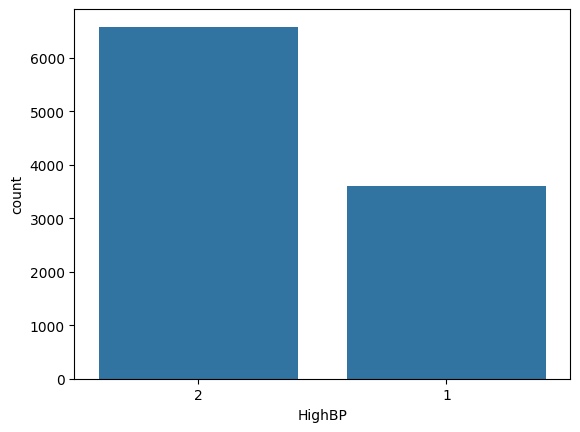

In [ ]:
sns.countplot(data=df ,x='HighBP') #1=Yes 2=No

<Axes: xlabel='HighBP', ylabel='Age'>

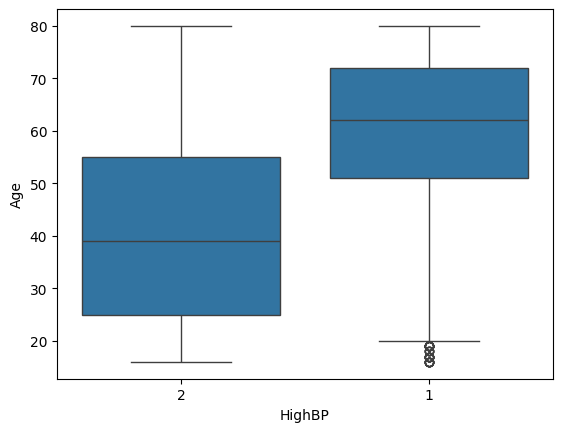

In [ ]:
sns.boxplot(x='HighBP',y='Age',data=df)  # High BP categorical  age continuous Boxplot

<Axes: xlabel='HighBP', ylabel='Smoker'>

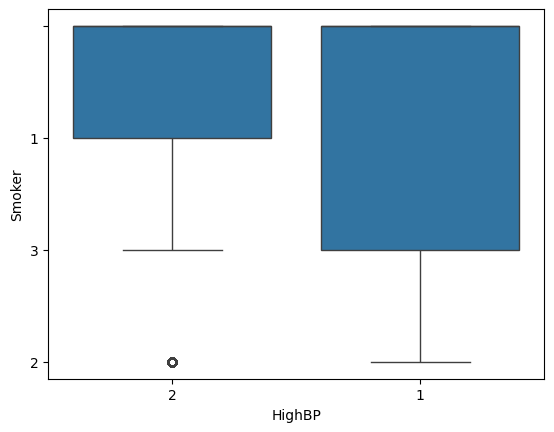

In [ ]:
#The person has Hypertension and is a smoker. SMQ040 1=everyday 2= somedays 3= No
sns.boxplot(x='HighBP',y='Smoker',data=df)

<Axes: xlabel='HighBP', ylabel='HighCholesterol'>

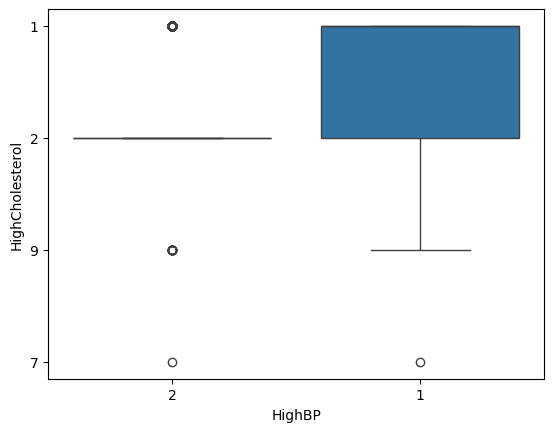

In [ ]:
#The person has Hypertension and high cholesterol. BPQ080 1= yes 2= no 9= dont know
sns.boxplot(x='HighBP',y='HighCholesterol',data=df)

In [ ]:

# Filtering to keep only rows where 'HighBP' is 1 or 2
filtered_df = subset_df[subset_df['HighBP'].isin([7, 9])]



In [ ]:
# Display the counts of each category in 'HighBP'
count_highBP = filtered_df['HighBP'].value_counts()




In [ ]:
filtered_df['HighBP'].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

AttributeError: 'float' object has no attribute 'isdigit'

In [ ]:
df['HighBP'].value_counts()

KeyError: 'HighBP'

In [ ]:
filtered_df['BMI'].value_counts()

Series([], Name: count, dtype: int64)

<Axes: xlabel='HighBP', ylabel='BMI'>

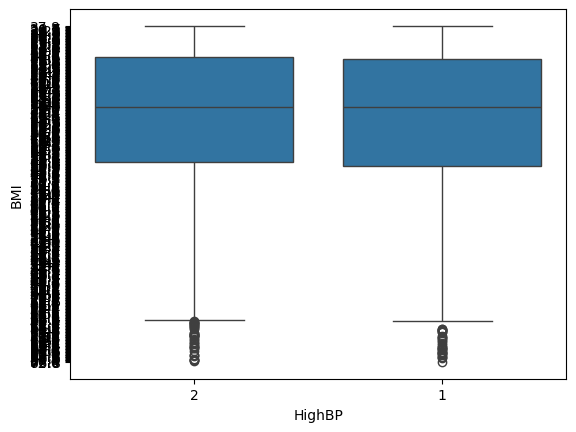

In [ ]:


# Plotting the boxplot
sns.boxplot(x='HighBP', y='BMI', data=df)



In [ ]:
df['Smoker'].value_counts()

Smoker
     6301
3    2199
1    1305
2     378
Name: count, dtype: int64

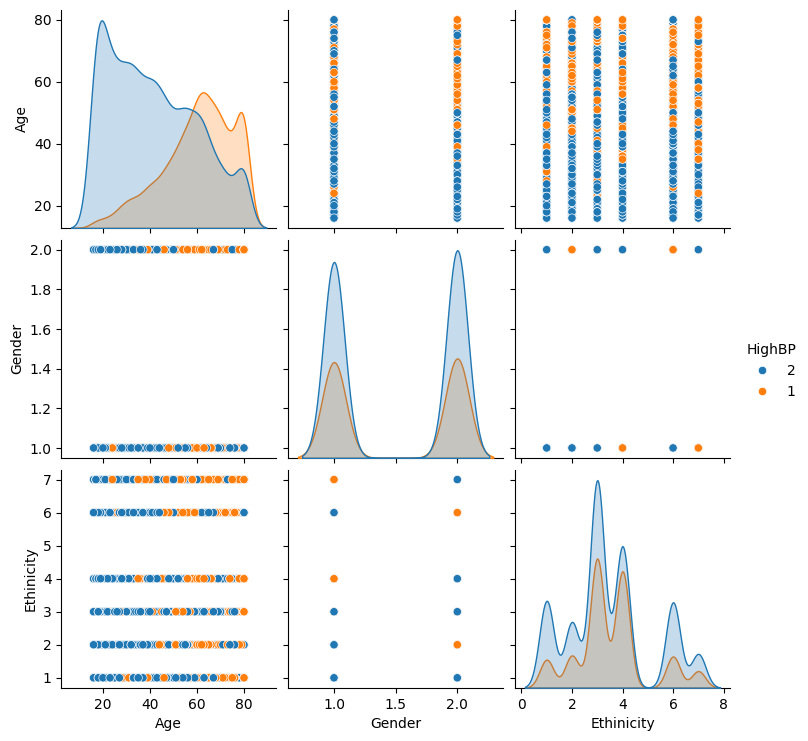

In [ ]:
sns.pairplot(df,hue='HighBP')

In [ ]:

sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: ' '

In [ ]:
#Filter columns Gender Age BMI Hypertension High Cholesterol Smoker
selected_columns = df.filter(items=['RIAGENDR', 'RIDAGEYR','BMXBMI','BPQ020','BPQ080','SMQ040'])
print(selected_columns)

Empty DataFrame
Columns: []
Index: [3, 4, 5, 8, 10, 11, 16, 19, 20, 21, 22, 23, 27, 28, 29, 30, 32, 34, 35, 37, 40, 42, 44, 48, 49, 50, 52, 53, 54, 56, 58, 59, 60, 61, 63, 64, 67, 68, 69, 70, 71, 72, 73, 74, 77, 79, 80, 83, 85, 86, 87, 88, 90, 91, 96, 98, 100, 102, 104, 106, 108, 110, 113, 114, 115, 116, 119, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 139, 140, 141, 142, 144, 145, 148, 150, 151, 152, 154, 160, 163, 165, 166, 168, 169, 172, 173, 174, 176, ...]

[10183 rows x 0 columns]


In [ ]:

sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: ' '

<Axes: xlabel='Age', ylabel='HighBP'>

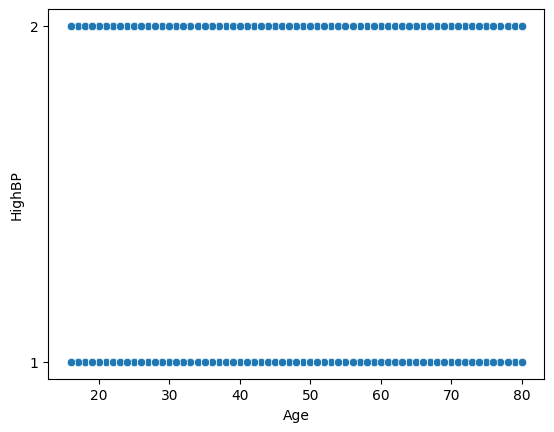

In [ ]:
#Age and hypertension
sns.scatterplot(x='Age',y='HighBP',data=df)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D




ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['2', '2', '2', ..., '2', '1', '2'], dtype=object)

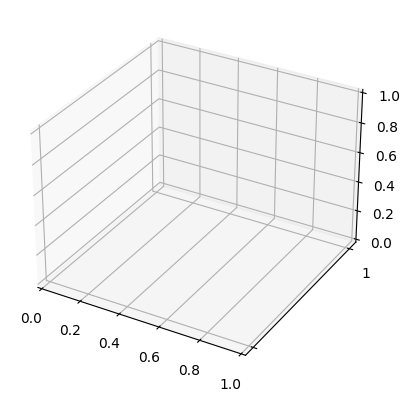

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['Smoker'],df['HighBP'],c=df['HighBP'])

In [ ]:
df.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,DMDBORN4,...,BMXLEG,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP
0,109263,66,2,1,2,,5,6,2,1,...,,,,,,,,,,
1,109264,66,2,2,13,,1,1,2,1,...,36.3,,33.8,,22.7,,63.8,,85,
2,109265,66,2,1,2,,3,3,2,1,...,,,18.6,,14.8,,41.2,,,
3,109266,66,2,2,29,,5,6,2,2,...,40.8,,34.7,,35.8,,117.9,,126.1,
4,109267,66,1,2,21,,2,2,,2,...,,,,,,,,,,


In [ ]:
subset_df = df[['RIDAGEYR', 'BMXBMI', 'BPQ020', 'RIAGENDR', 'BPQ080', 'RIDRETH3','SMQ040']]

KeyError: "None of [Index(['RIDAGEYR', 'BMXBMI', 'BPQ020', 'RIAGENDR', 'BPQ080', 'RIDRETH3',\n       'SMQ040'],\n      dtype='object')] are in the [columns]"

In [ ]:
subset_df.columns = ['Age', 'BMI', 'HighBP', 'Gender', 'HighCholesterol', 'Ethinicity', 'Smoker']

In [ ]:
subset_df.dropna()

,Age,BMI,HighBP,Gender,HighCholesterol,Ethinicity,Smoker
0,2,,,Male,,6,
1,13,17.6,,Female,,1,
2,2,15,,Male,,3,
3,29,37.8,2,Female,1,6,
4,21,,2,Female,2,2,
...,...,...,...,...,...,...,...
15555,40,38.2,2,Male,2,4,
15556,2,17.5,,Male,,4,
15557,7,15.1,,Female,,3,
15558,63,25.5,1,Male,1,4,


In [ ]:
df = filtered_df[filtered_df['HighBP'].apply(lambda x: x.isdigit())]

In [ ]:
df.head()

""


In [ ]:
# Function to recode BMI into categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal weight'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'



In [ ]:
# Apply the categorization function to the BMI column
df['BMI'] = df['BMI'].apply(categorize_BMI)

NameError: name 'categorize_BMI' is not defined

In [ ]:
df['BMI'].value_counts()

KeyError: 'BMI'

In [ ]:
df = subset_df[subset_df['HighCholesterol'].isin([7, 9])]

In [ ]:
df = df[df['HighCholesterol'].apply(lambda x: x.isdigit())]


In [ ]:
subset_df['HighCholesterol'].value_counts()

KeyError: 'HighCholesterol'

In [ ]:
df = pd.DataFrame(df)

In [ ]:
# defining the dependent and independent variables
Xtrain = df[['Age', 'BMI', 'Ethinicity', 'HighCholesterol','Smoker', 'Gender']]
ytrain = df[['HighBP']]

In [ ]:
# Or drop rows with any NaN values (make sure this does not drop too many rows)
Xtrain.dropna(inplace=True)
ytrain = ytrain[Xtrain.index]  # Make sure ytrain aligns with the modified Xtrain

<ipython-input-65-e67281d3288c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xtrain.dropna(inplace=True)


KeyError: "None of [Index([    3,     4,     5,     8,    10,    11,    16,    19,    20,    21,\n       ...\n       15547, 15548, 15549, 15550, 15551, 15552, 15554, 15555, 15558, 15559],\n      dtype='int64', length=10195)] are in the [columns]"

In [ ]:
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
df['Ethinicity'].value_counts()

Ethinicity
Non-Hispanic White    3517
Non-Hispanic Black    2685
Hispanic              2228
Other                 1753
Name: count, dtype: int64

In [ ]:
#data = {
    #'Ethnicity': [1, 2, 3, 4, 6, 7, 2, 3, 1, 7]
#}

In [ ]:
#df = pd.DataFrame(data)

In [ ]:
#df['Ethinicity']

In [ ]:
# Mapping dictionary to recode Ethinicity
recode_map = {
    1: 'Hispanic',  # Mexican American
    2: 'Hispanic',  # Other Hispanic
    3: 'Non-Hispanic White',  # Non-Hispanic White
    4: 'Non-Hispanic Black',  # Non-Hispanic Black
    6: 'Other',  # Non-Hispanic Asian
    7: 'Other'   # Other
}



In [ ]:
df['Ethinicity'] = df['Ethinicity'].map(recode_map)

In [ ]:
df['Ethinicity'].value_counts()

Ethinicity
Non-Hispanic White    3517
Non-Hispanic Black    2685
Hispanic              2228
Other                 1753
Name: count, dtype: int64

In [ ]:
df = filtered_df[filtered_df['Smoker'].apply(lambda x: x.isdigit())]

In [ ]:
df['Smoker'].value_counts()


Smoker
3    2187
1    1295
2     372
Name: count, dtype: int64

In [ ]:
df.describe()

,Age,Gender,Ethinicity
count,10183.000000,10183.000000,10183.000000
mean,47.952175,1.512717,3.494452
std,19.503541,0.499863,1.582953
min,16.000000,1.000000,1.000000
25%,31.000000,1.000000,3.000000
50%,49.000000,2.000000,3.000000
75%,64.000000,2.000000,4.000000
max,80.000000,2.000000,7.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10183 entries, 3 to 15559
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              10183 non-null  int64 
 1   BMI              10183 non-null  object
 2   HighBP           10183 non-null  object
 3   Gender           10183 non-null  int64 
 4   HighCholesterol  10183 non-null  object
 5   Ethinicity       10183 non-null  int64 
 6   Smoker           10183 non-null  object
dtypes: int64(3), object(4)
memory usage: 636.4+ KB


In [ ]:
#Train Test Split and Scaling
X = df.drop('BPQ020',axis=1)
y = df['BPQ020']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

ValueError: could not convert string to float: ' '

In [ ]:
#Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression



In [ ]:
# help(LogisticRegression)
# help(LogisticRegressionCV)


In [ ]:
log_model = LogisticRegression()

In [ ]:
#Error that scaled_X_train was not defined. Attempted to define above but above error gave could not convert string to a float
log_model.fit(scaled_X_train,y_train)

NameError: name 'scaled_X_train' is not defined

In [ ]:
#Coefficient Interpretation
log_model.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [ ]:
#Model Performance on Classification Tasks
#Errors cannot import name 'plot_confusion_matrix from sklearn.metrics so unable to do the following

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
y_pred = log_model.predict(scaled_X_test)

NameError: name 'scaled_X_test' is not defined

In [ ]:
accuracy_score(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_pred' is not defined

In [ ]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
print(classification_report(y_test,y_pred))

NameError: name 'y_pred' is not defined

In [ ]:

X_train.iloc[0]

NameError: name 'X_train' is not defined

In [ ]:
y_train.iloc[0]

log_model.predict_proba(X_train.iloc[0].values.reshape(1, -1))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
log_model.predict(X_train.iloc[0].values.reshape(1, -1))

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
#Evaluating curves and AUC
#error can not import 'plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

In [ ]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

In [ ]:
plot_roc_curve(log_model,scaled_X_test,y_test)